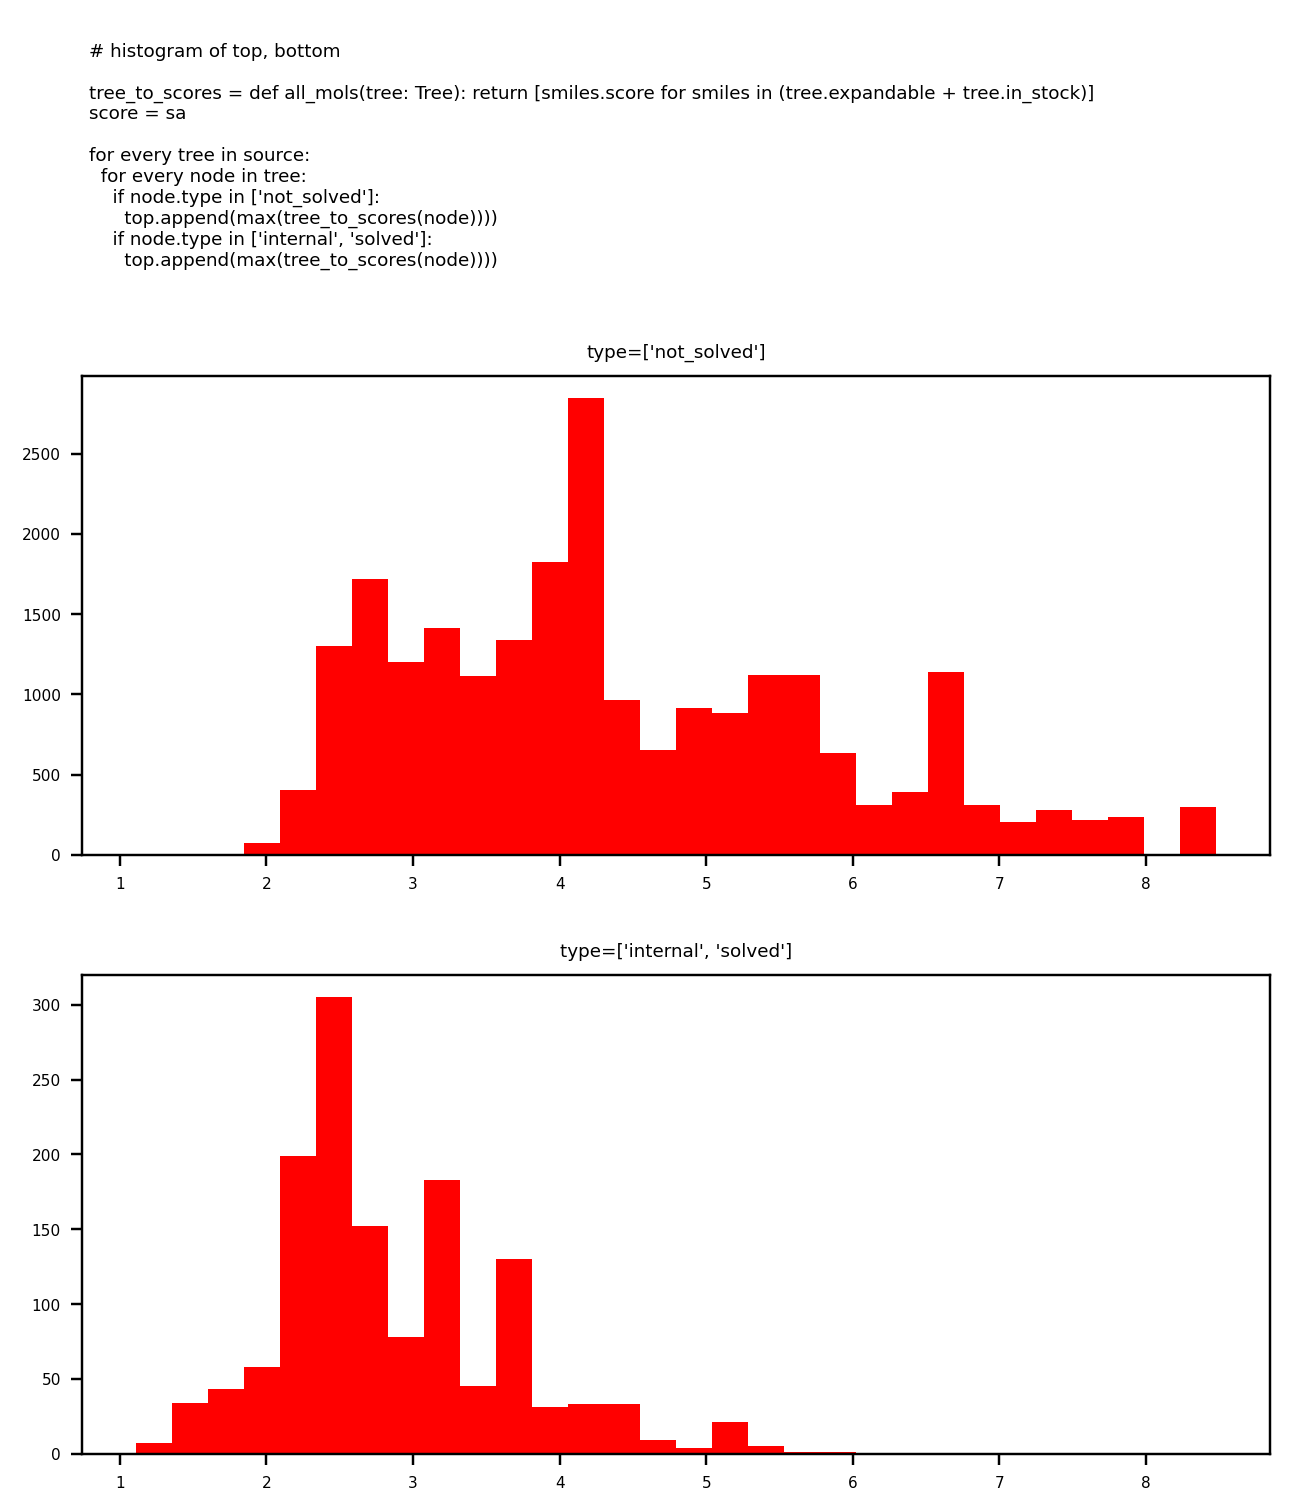

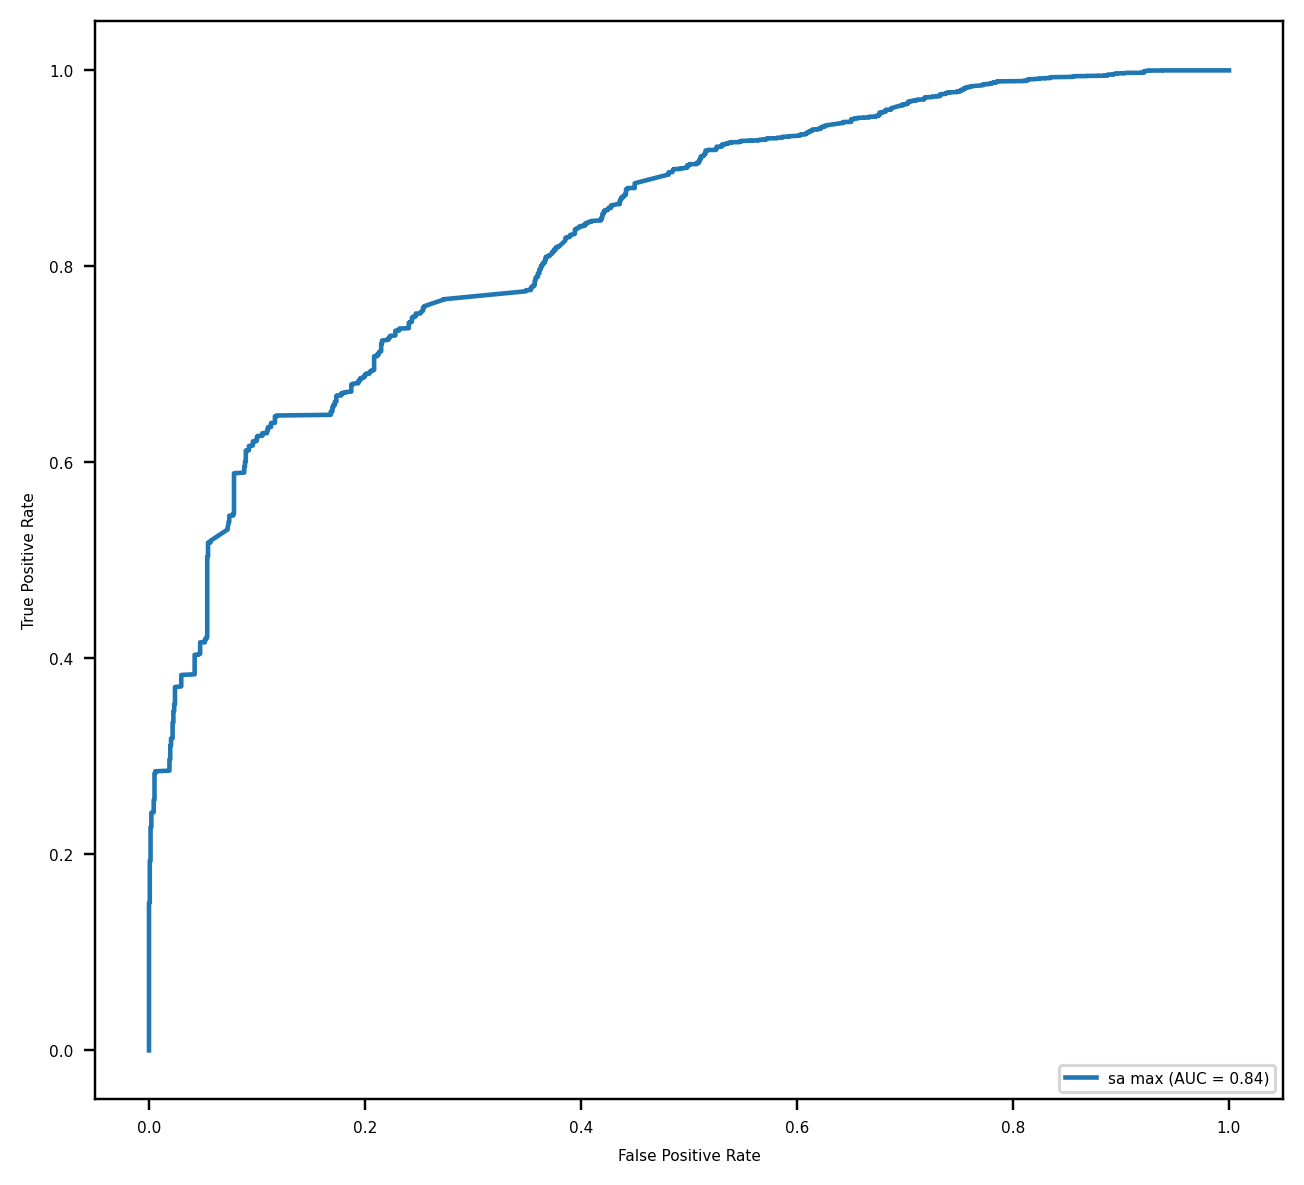

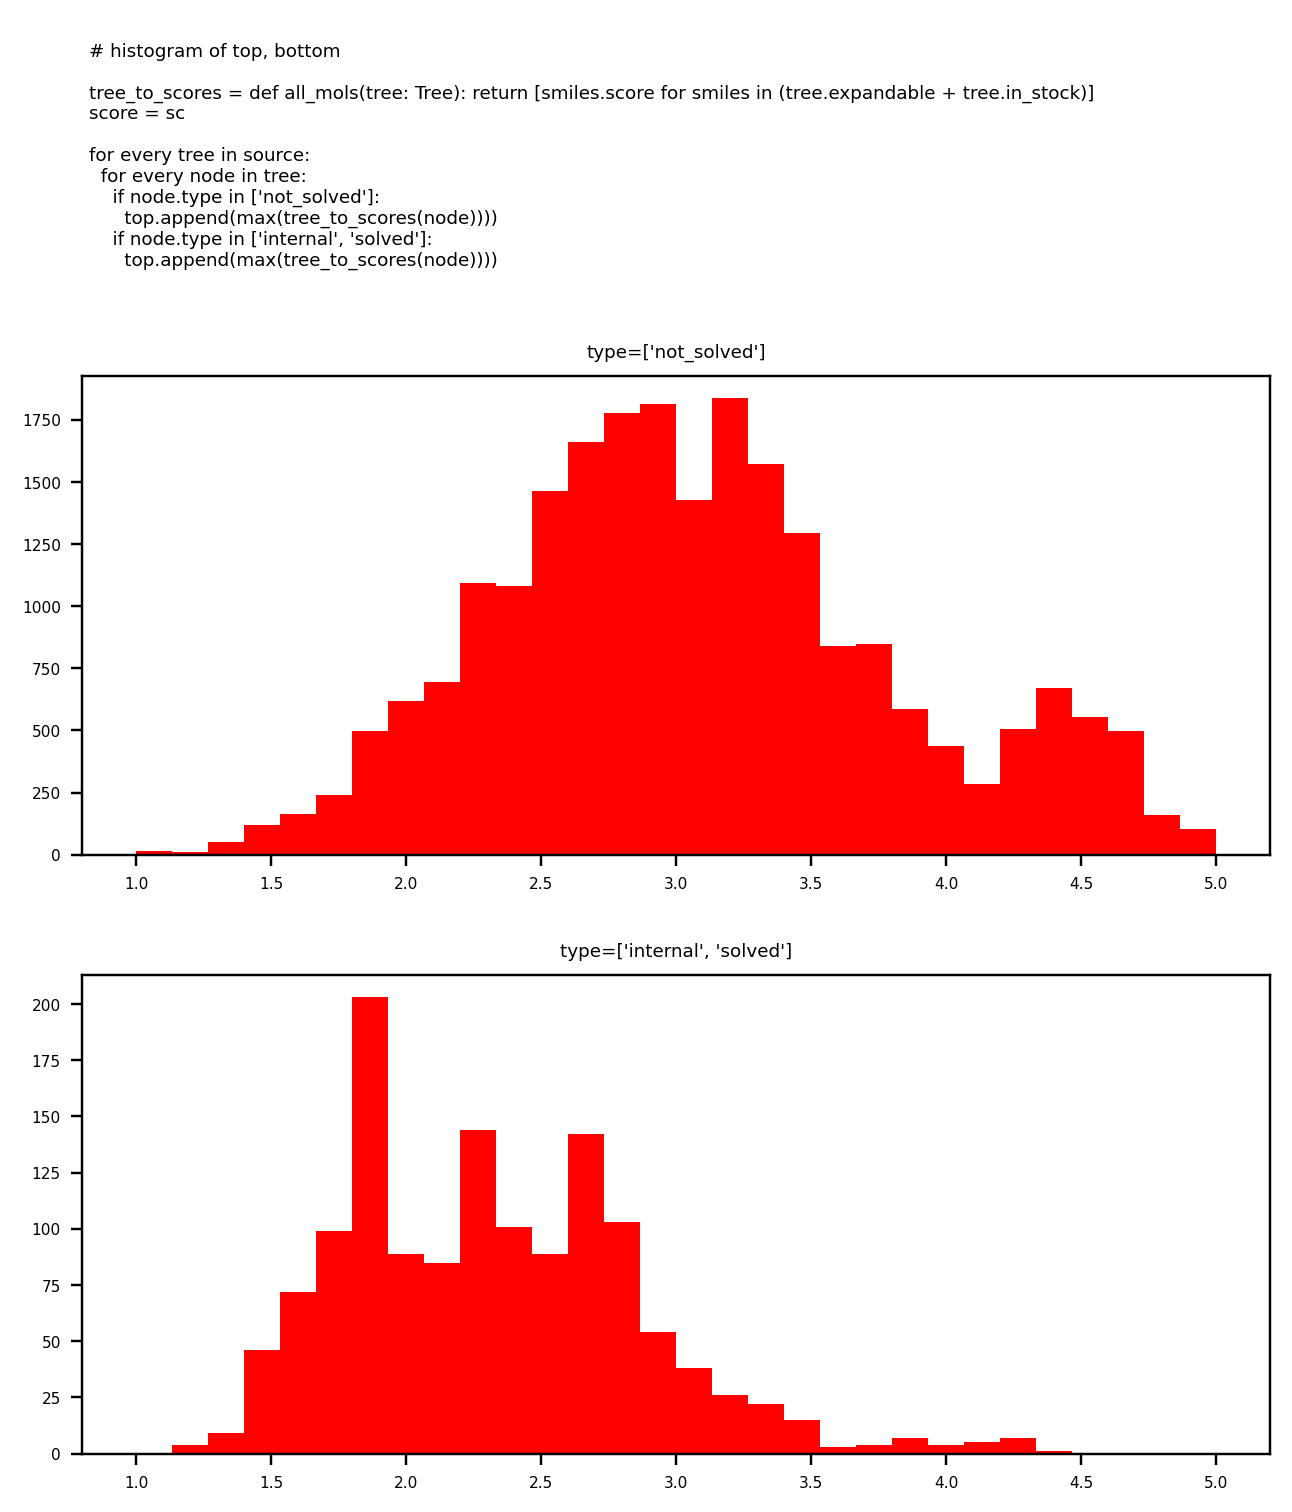

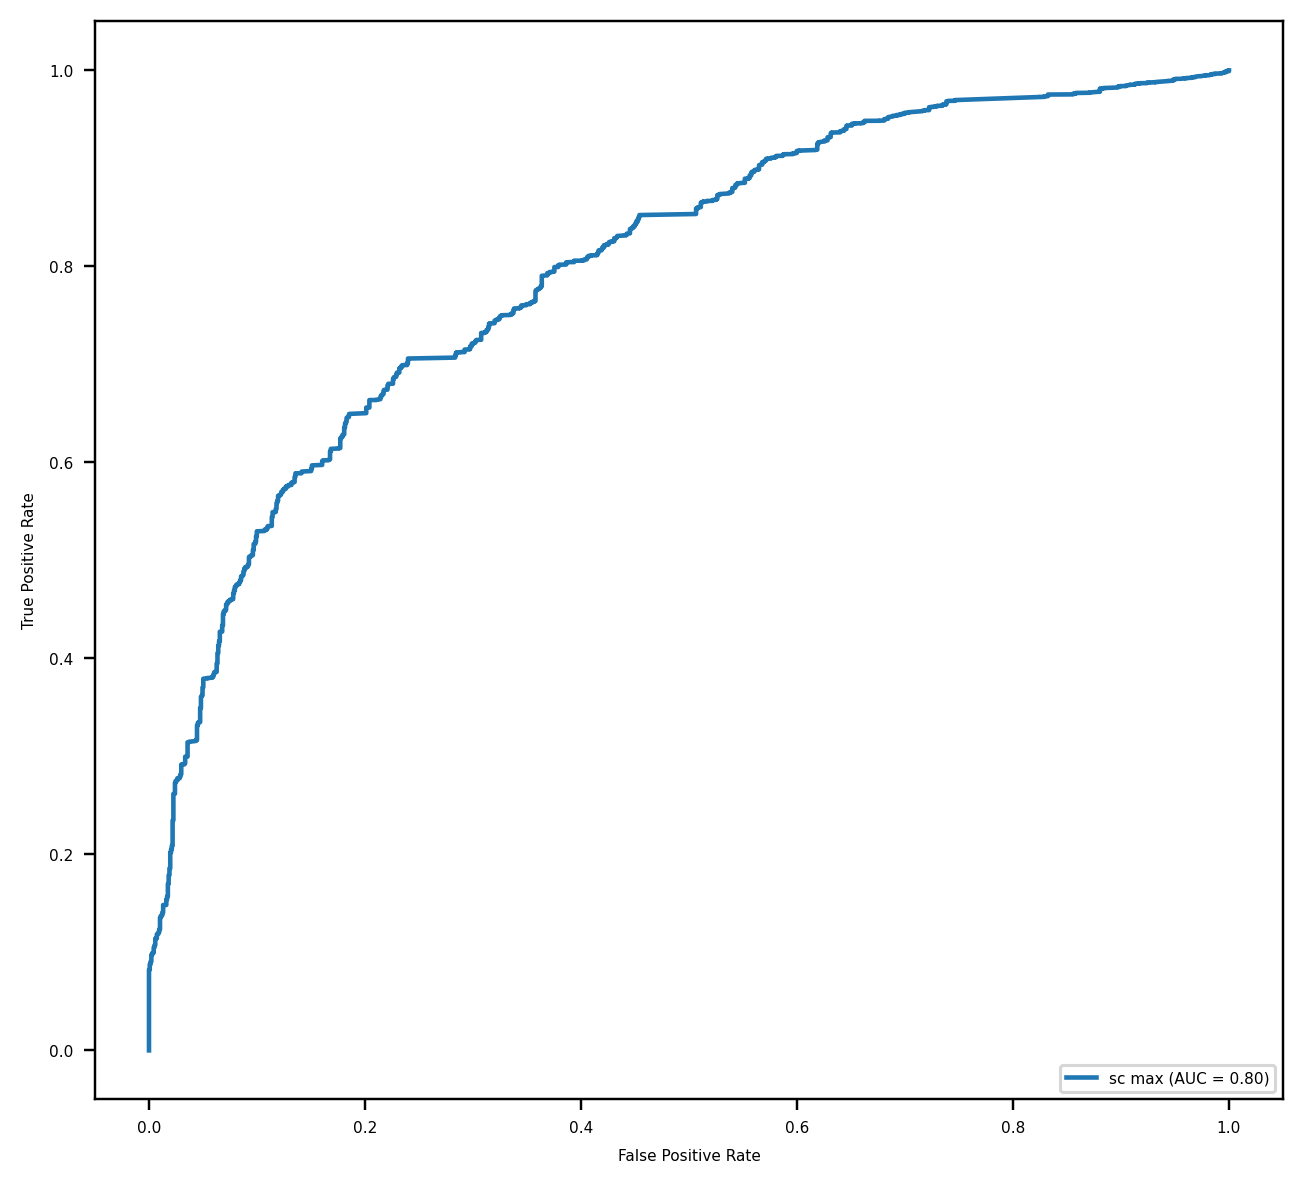

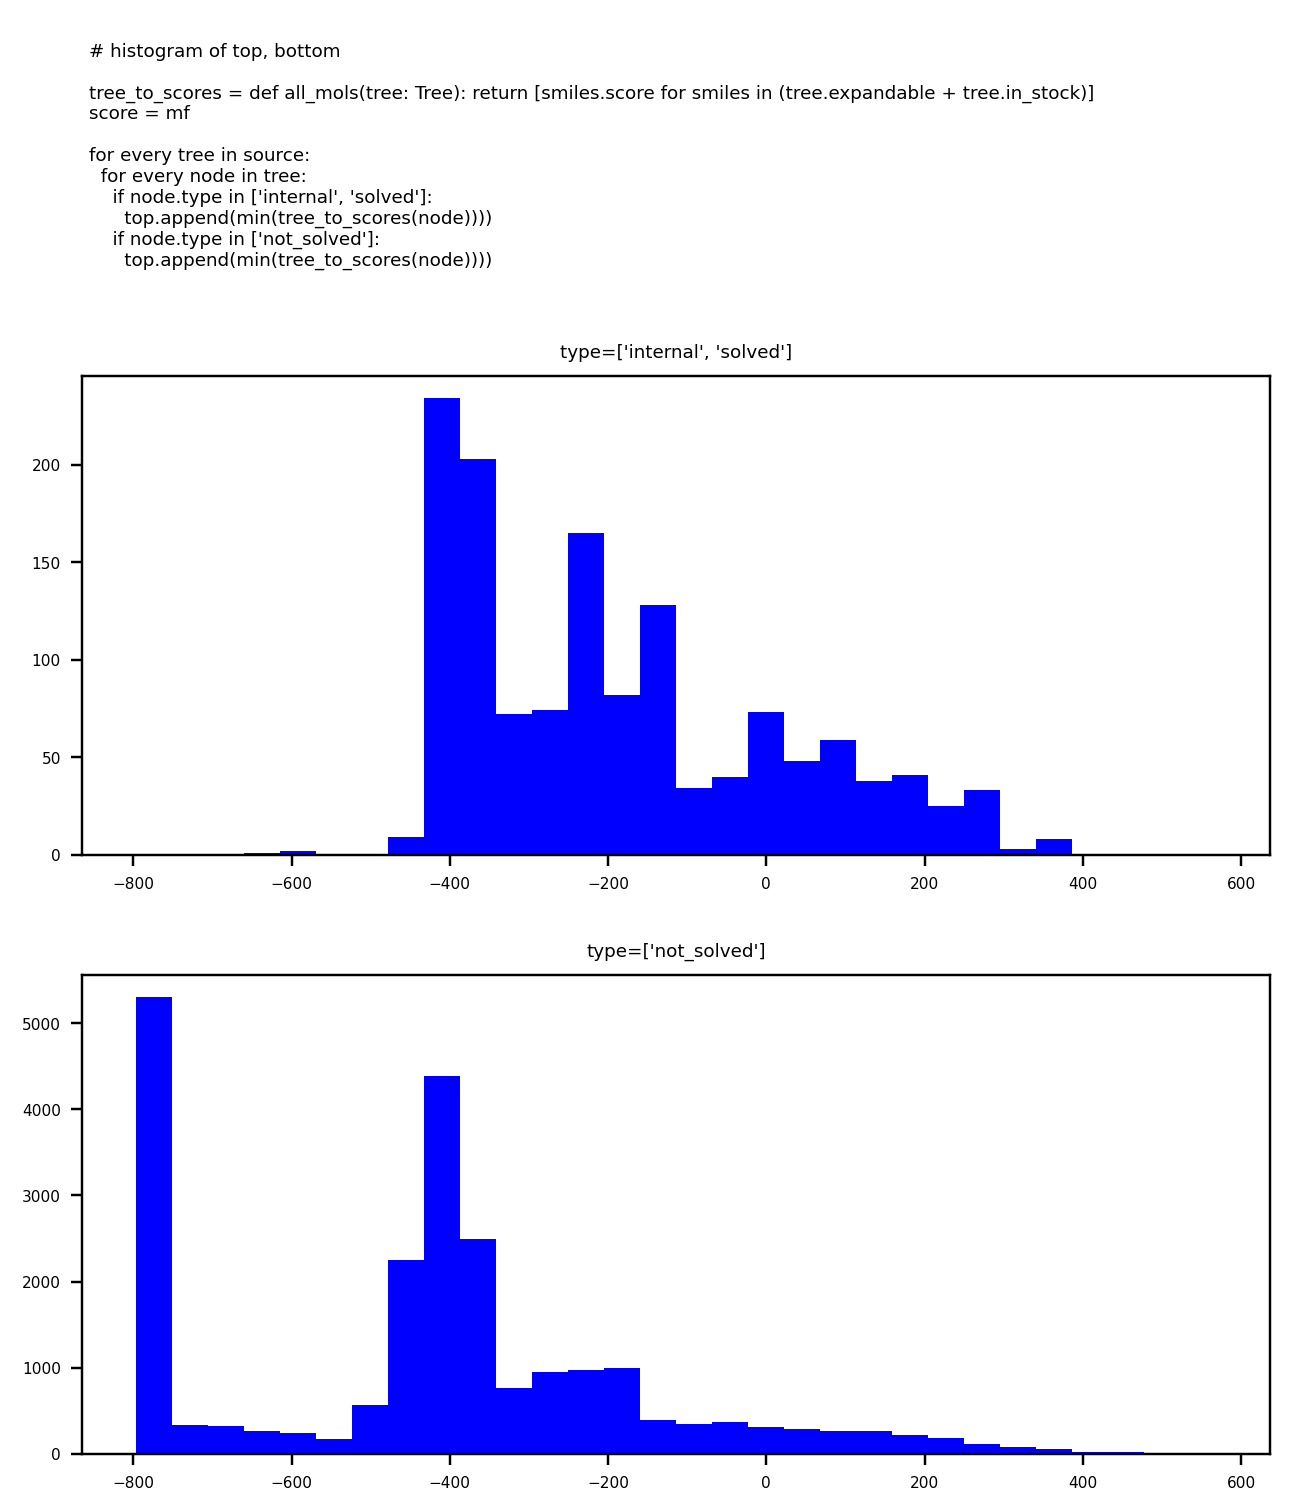

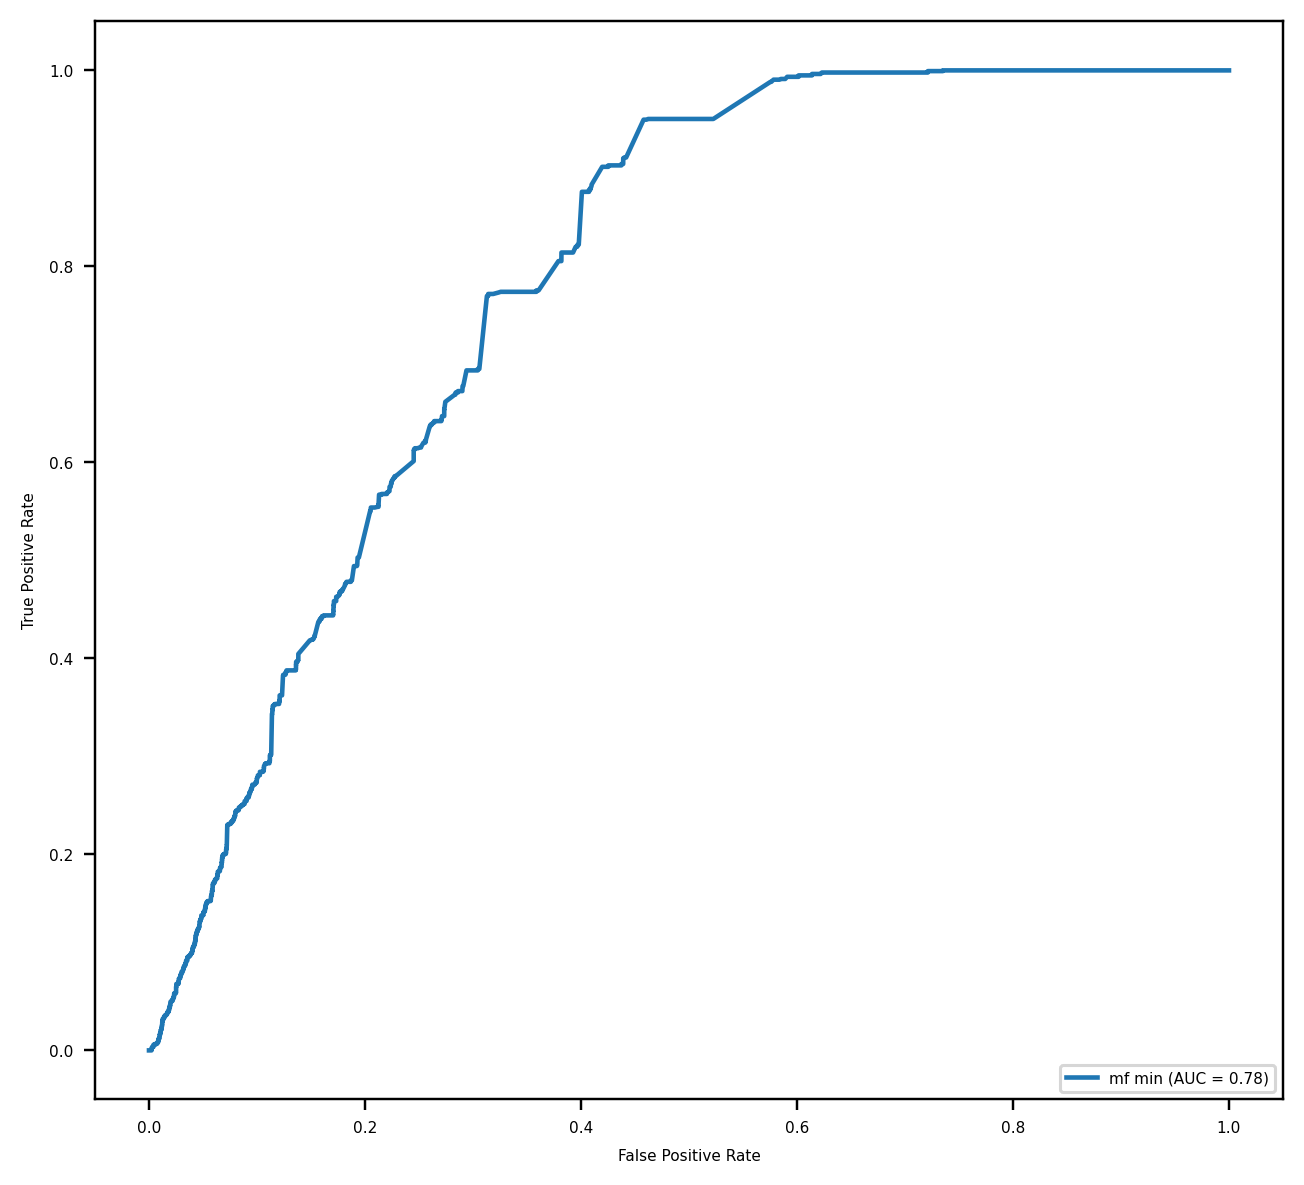

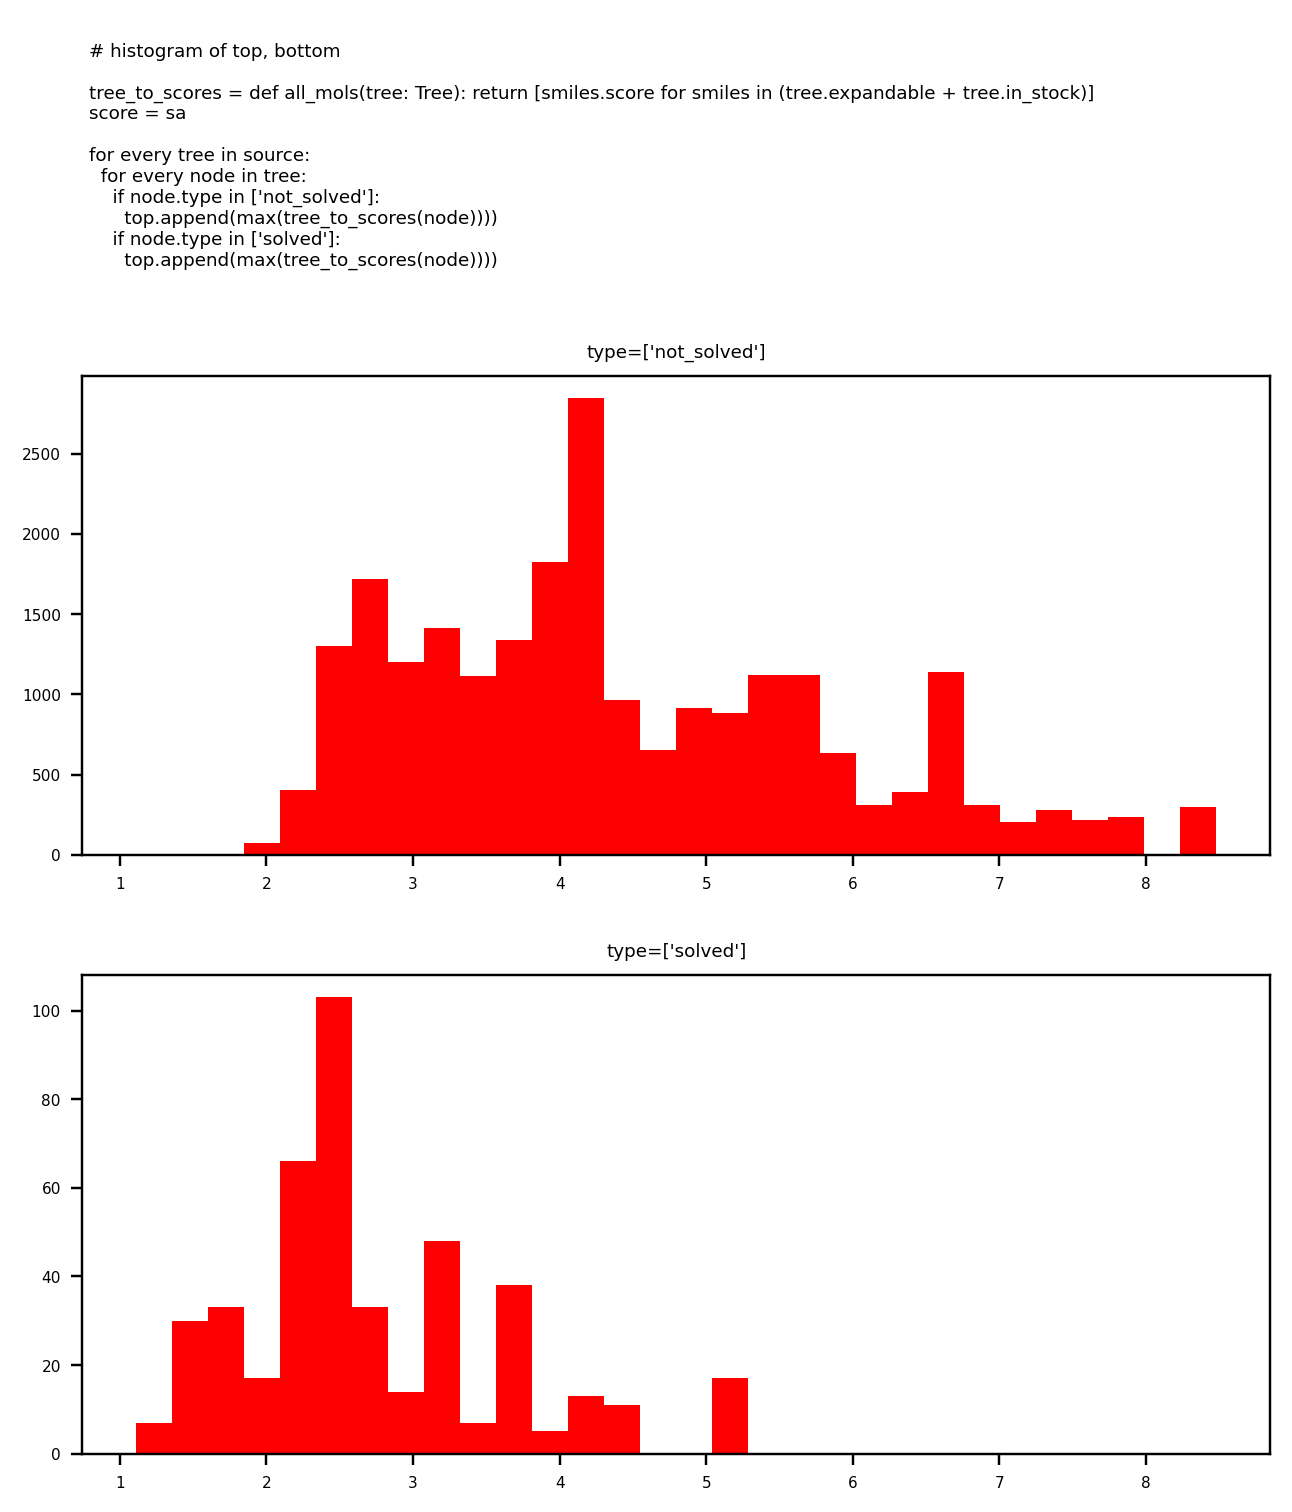

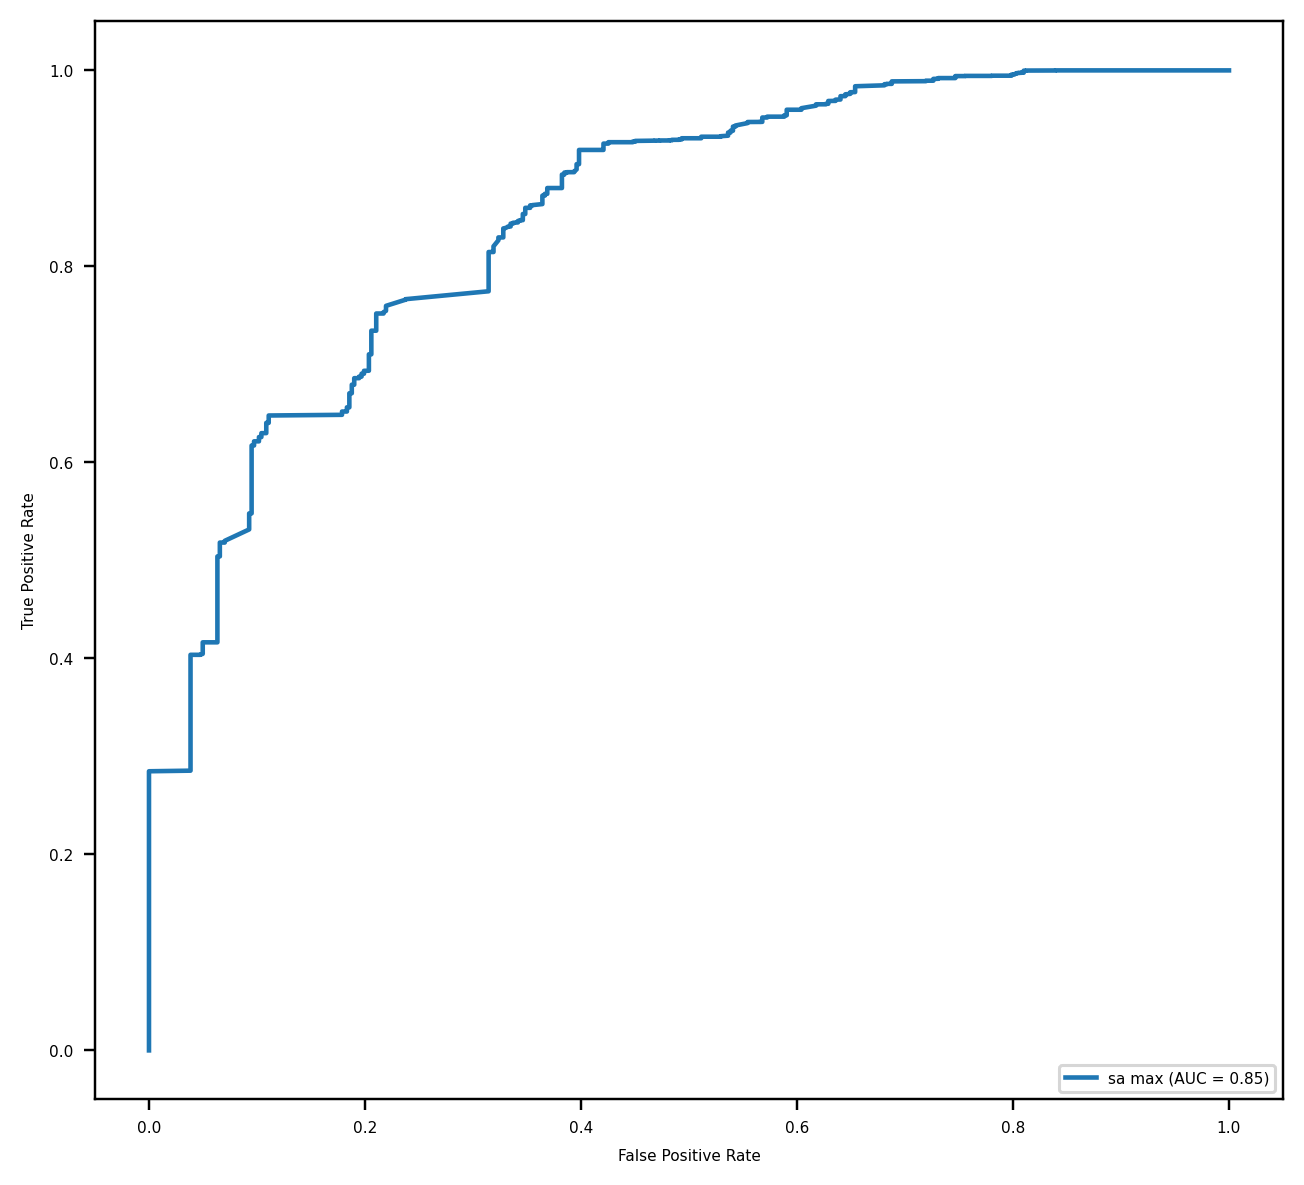

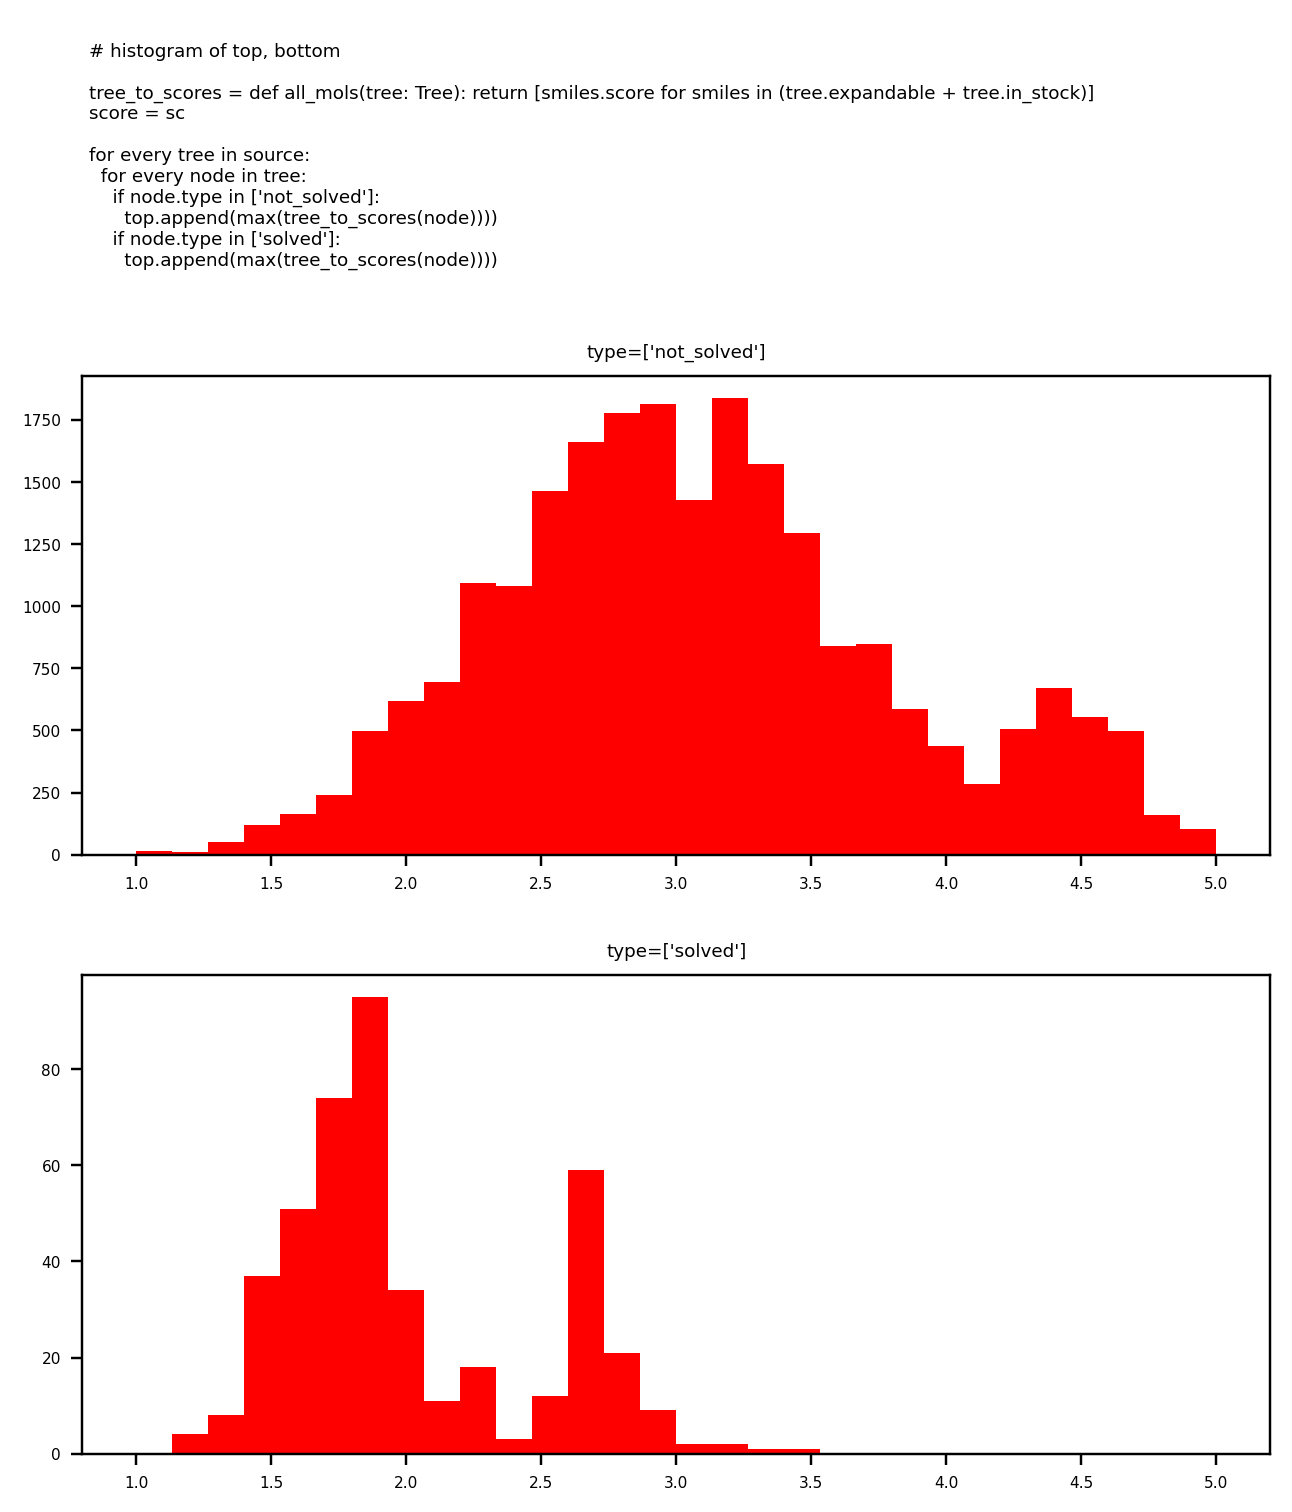

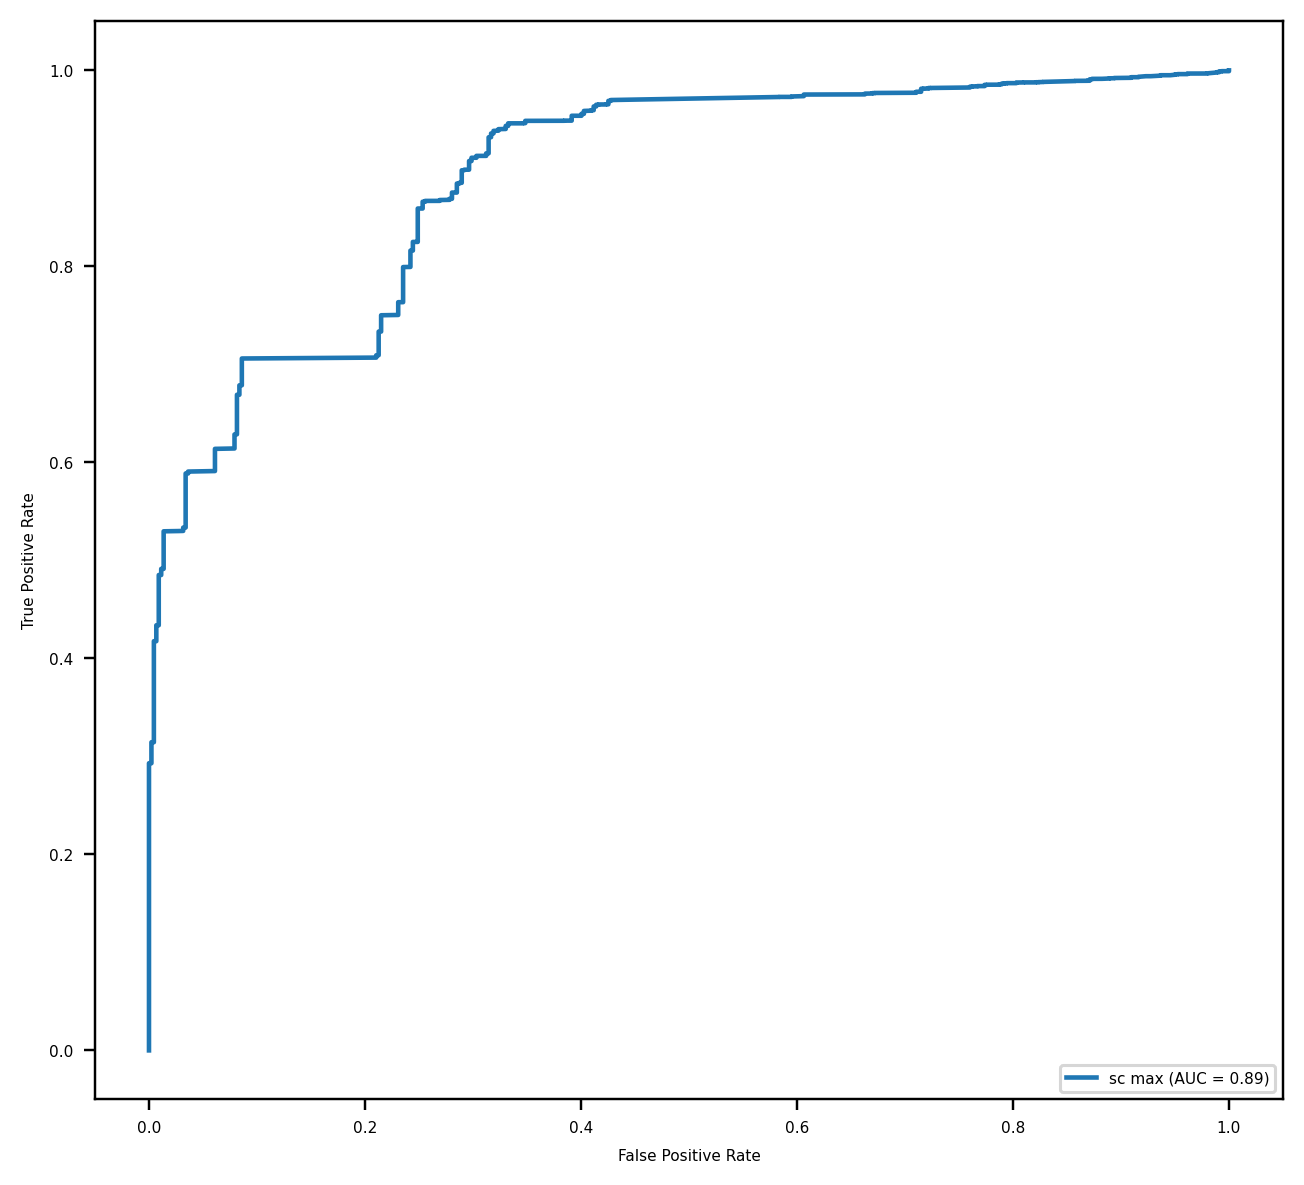

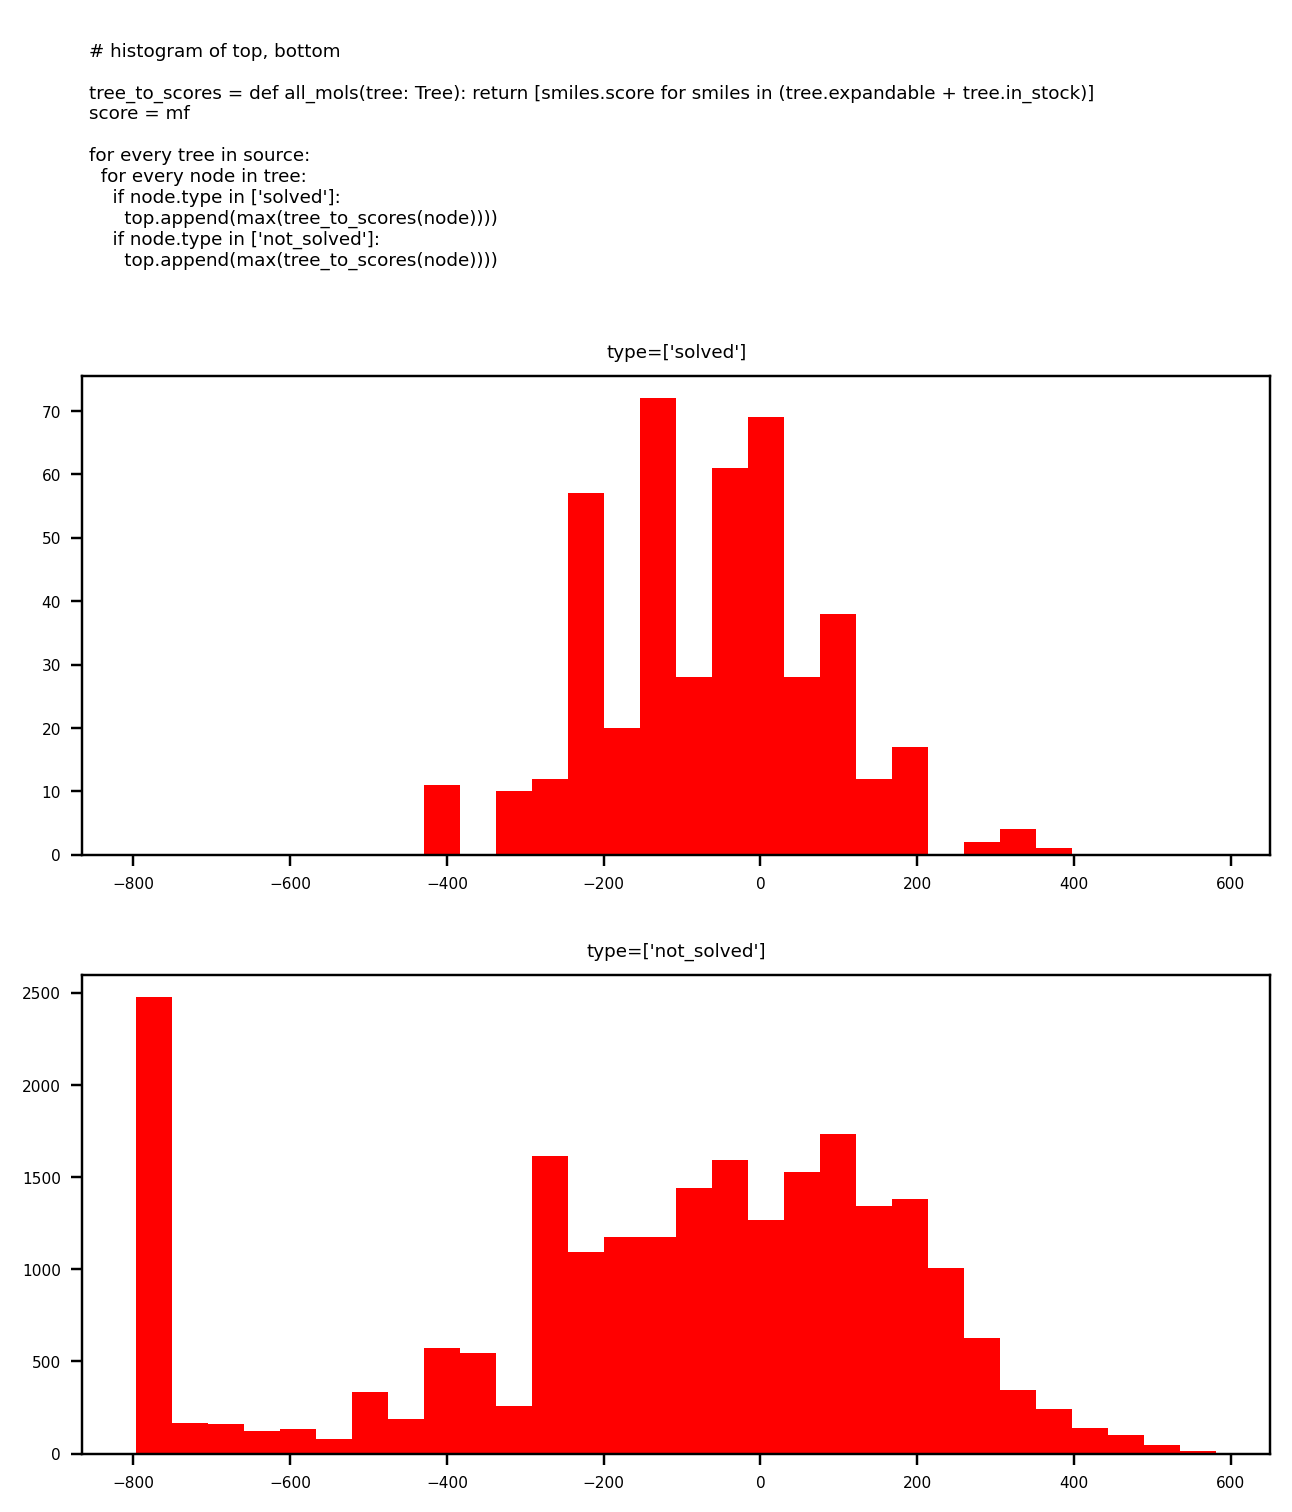

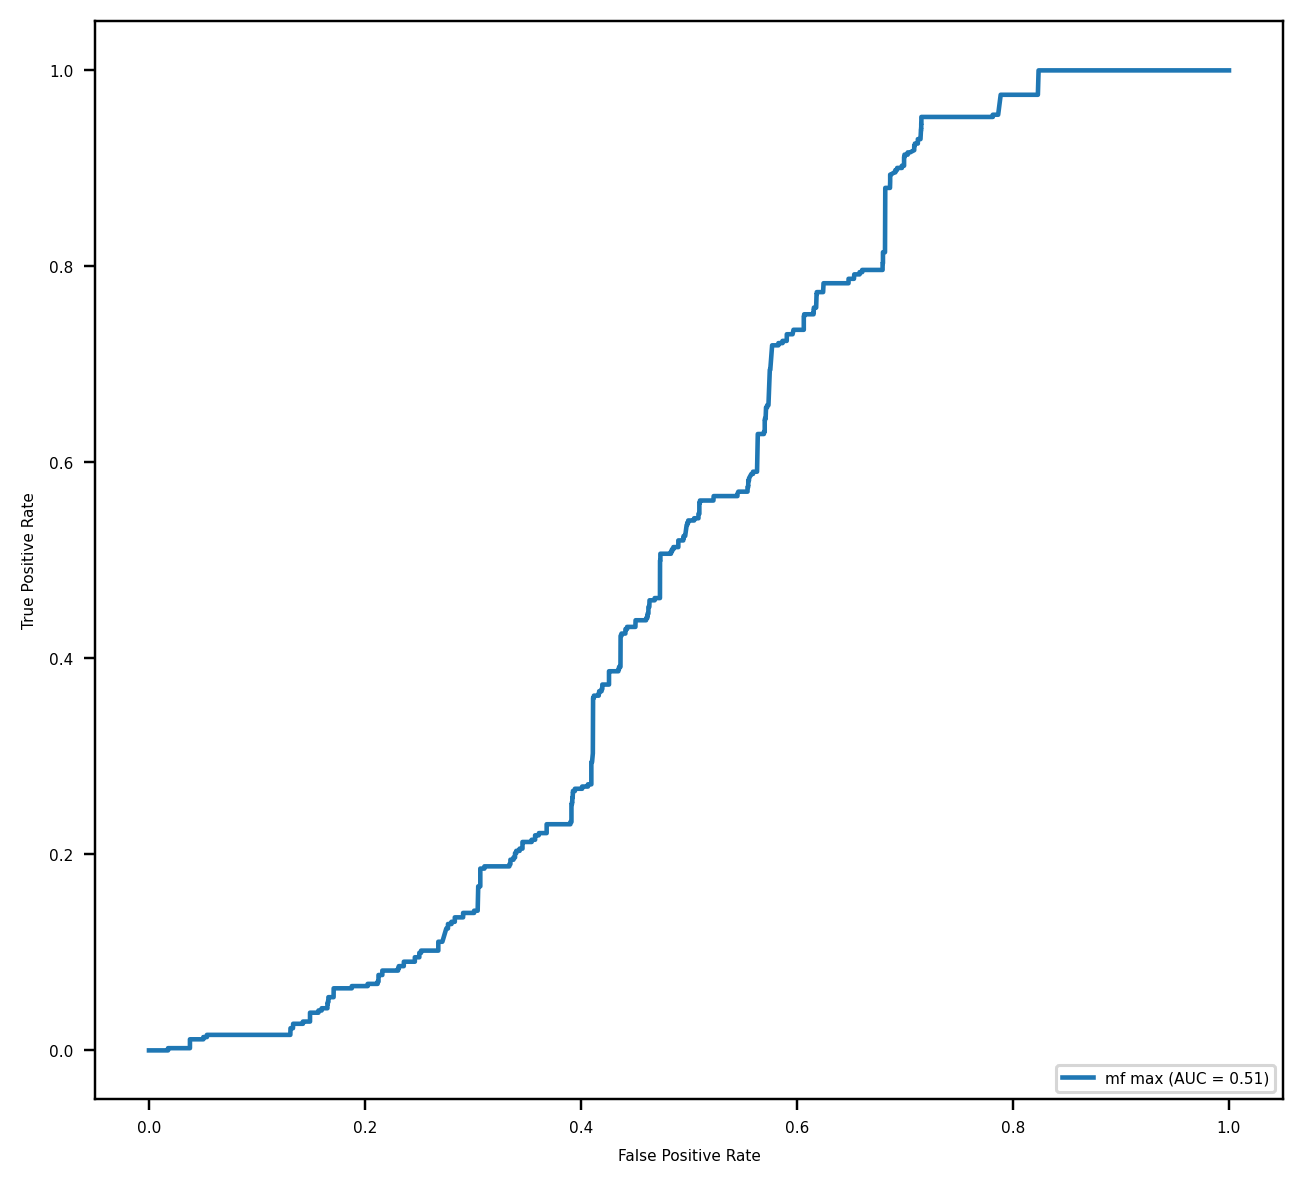

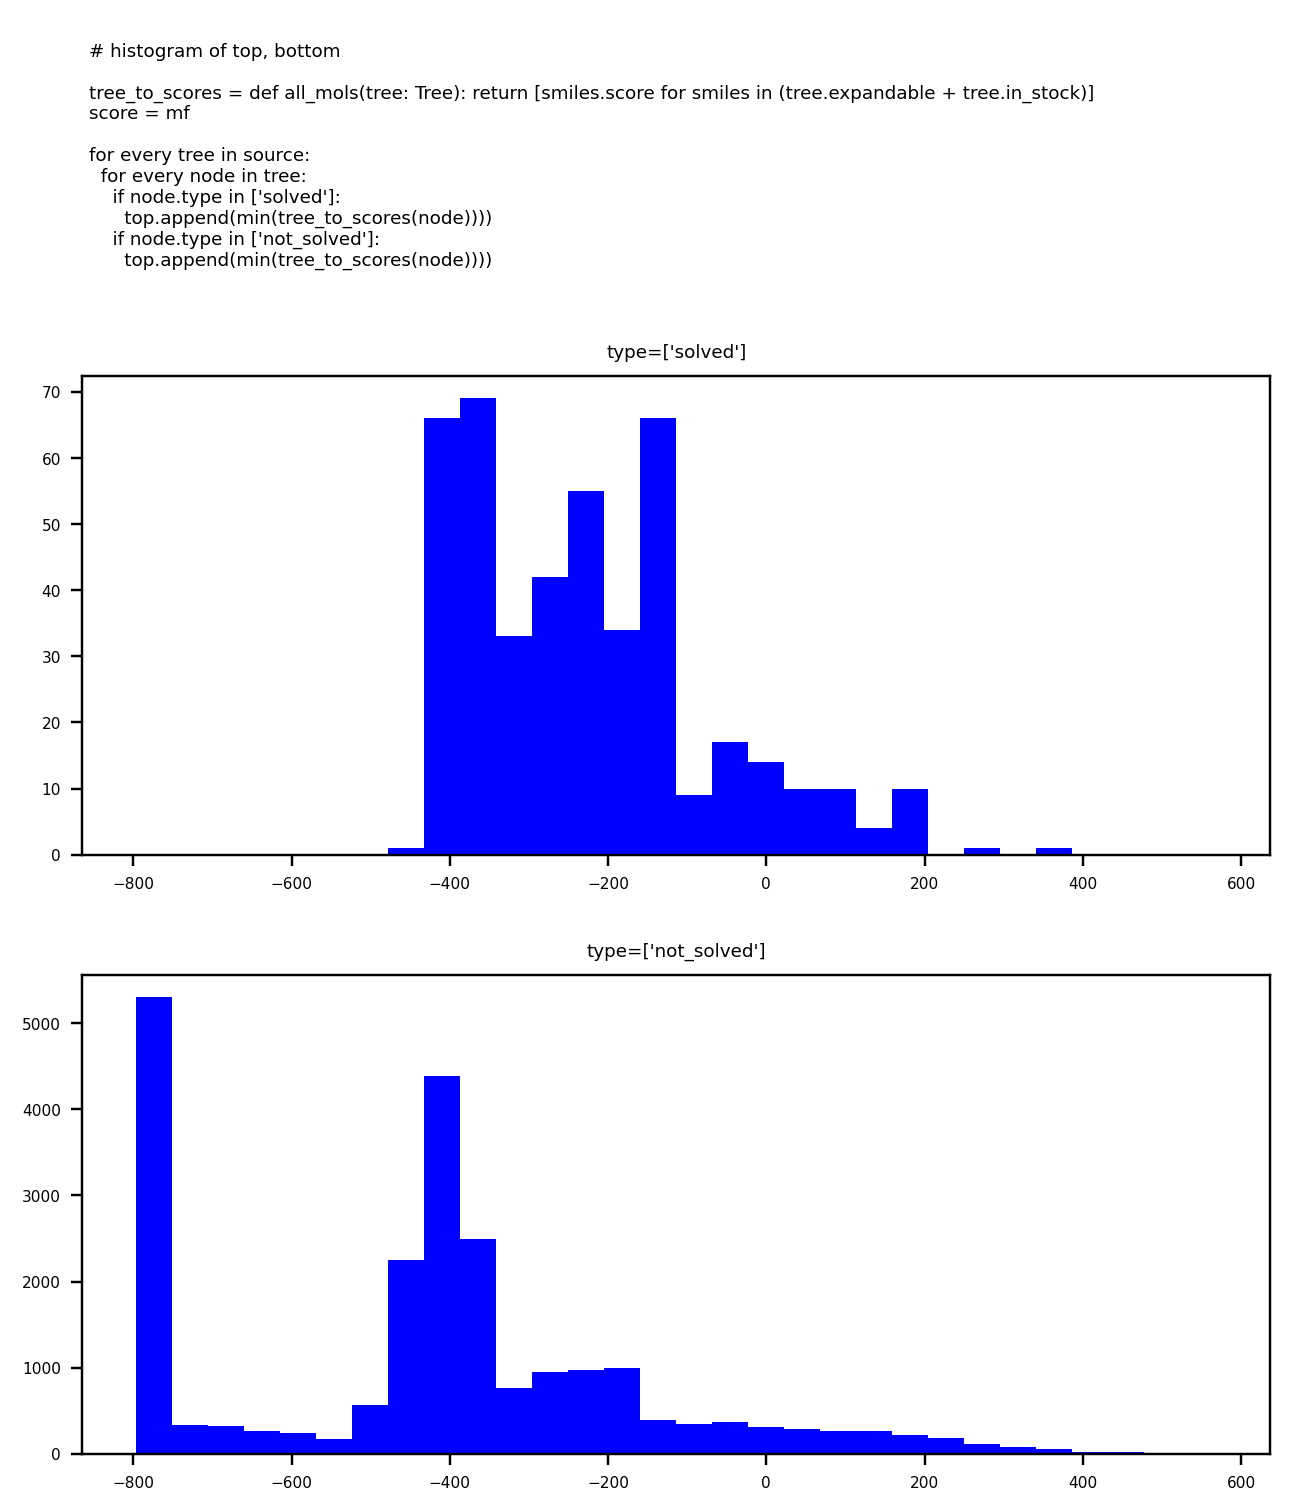

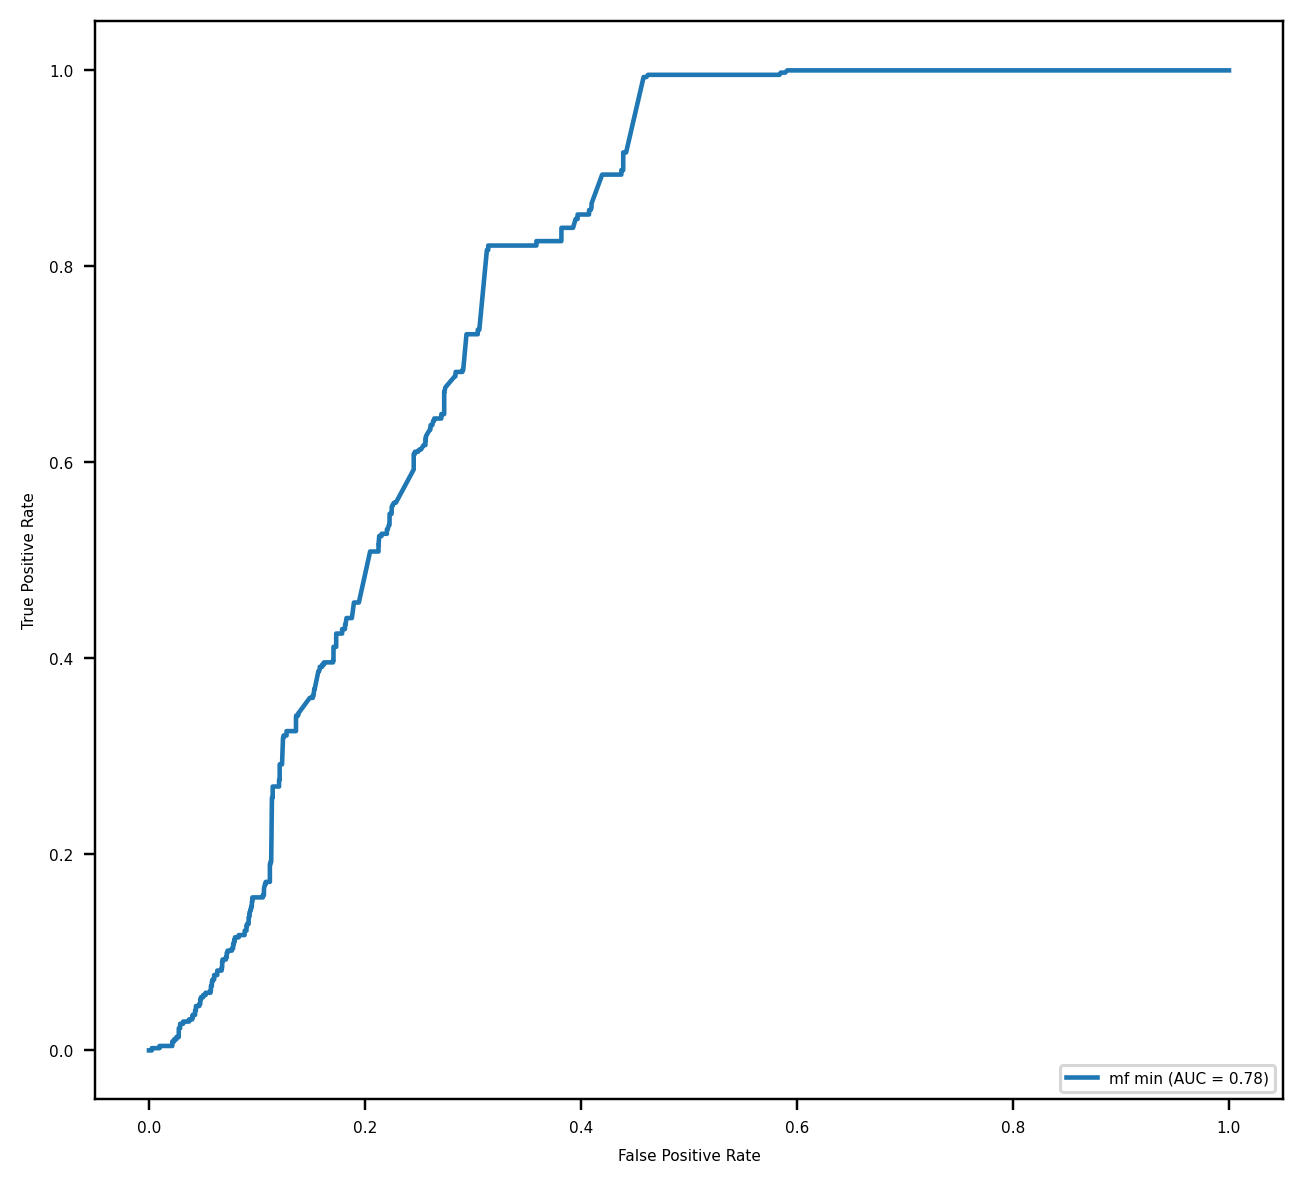

In [1]:
%load_ext autoreload
%autoreload 2
from typing import Tuple
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_top_bottom,
    display_str,
    input_data,
    AggTuple, ScoreGetter, agg_list
)

def f(
  ttype: list[TreeTypes],
  btype: list[TreeTypes],
  agg_tuple: AggTuple,
  score_getter: Tuple[str, ScoreGetter],
): return ttype, btype, agg_tuple, score_getter

sa, sc, ra, mf, syba = Score.getters()
min, max, avg = agg_list
def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False
if not detailed:
    [(_, source)] = list(input_data(False))
    display_str(source)

for ttype, btype, agg_tuple, score_getter in [
    f(["not_solved"], ["internal", "solved"], max, sa),
    f(["not_solved"], ["internal", "solved"], max, sc),
    f(["internal", "solved"], ["not_solved"], min, mf),
    f(["not_solved"], ["solved"], max, sa),
    f(["not_solved"], ["solved"], max, sc),
    f(["solved"], ["not_solved"], max, mf),
    f(["solved"], ["not_solved"], min, mf),
]:
    histogram_top_bottom(ttype, btype, all_mols, agg_tuple, score_getter, detailed)

